In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
age_education_df = pd.read_csv('age_education.csv')
age_education_df

,age,education
0,27.007219,college
1,47.615409,highschool
2,51.382815,highschool
3,54.906622,highschool
4,27.719939,less_than_highschool
...,...,...
995,57.550481,less_than_highschool
996,23.726849,college
997,52.828647,highschool
998,54.411223,highschool


In [ ]:
age_education_df.columns

Index(['age', 'education'], dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(age_education_df[['age']])
age_education_df['age_Z'] = scaler.transform(age_education_df[['age']])

In [ ]:
from kmodes.kprototypes import KPrototypes

x = age_education_df[['age_Z','education']].values
kp = KPrototypes(n_clusters=3)
age_education_df['Cluster'] = kp.fit_predict(x, categorical = [1])

In [ ]:
age_education_df = pd.concat([age_education_df, pd.get_dummies(age_education_df['education'])], axis=1)
age_education_df

,age,education,age_Z,Cluster,college,highschool,less_than_highschool
0,27.007219,college,-1.446982,1,1,0,0
1,47.615409,highschool,0.438918,0,0,1,0
2,51.382815,highschool,0.783681,0,0,1,0
3,54.906622,highschool,1.106153,0,0,1,0
4,27.719939,less_than_highschool,-1.381759,1,0,0,1
...,...,...,...,...,...,...,...
995,57.550481,less_than_highschool,1.348098,2,0,0,1
996,23.726849,college,-1.747175,1,1,0,0
997,52.828647,highschool,0.915993,0,0,1,0
998,54.411223,highschool,1.060818,0,0,1,0


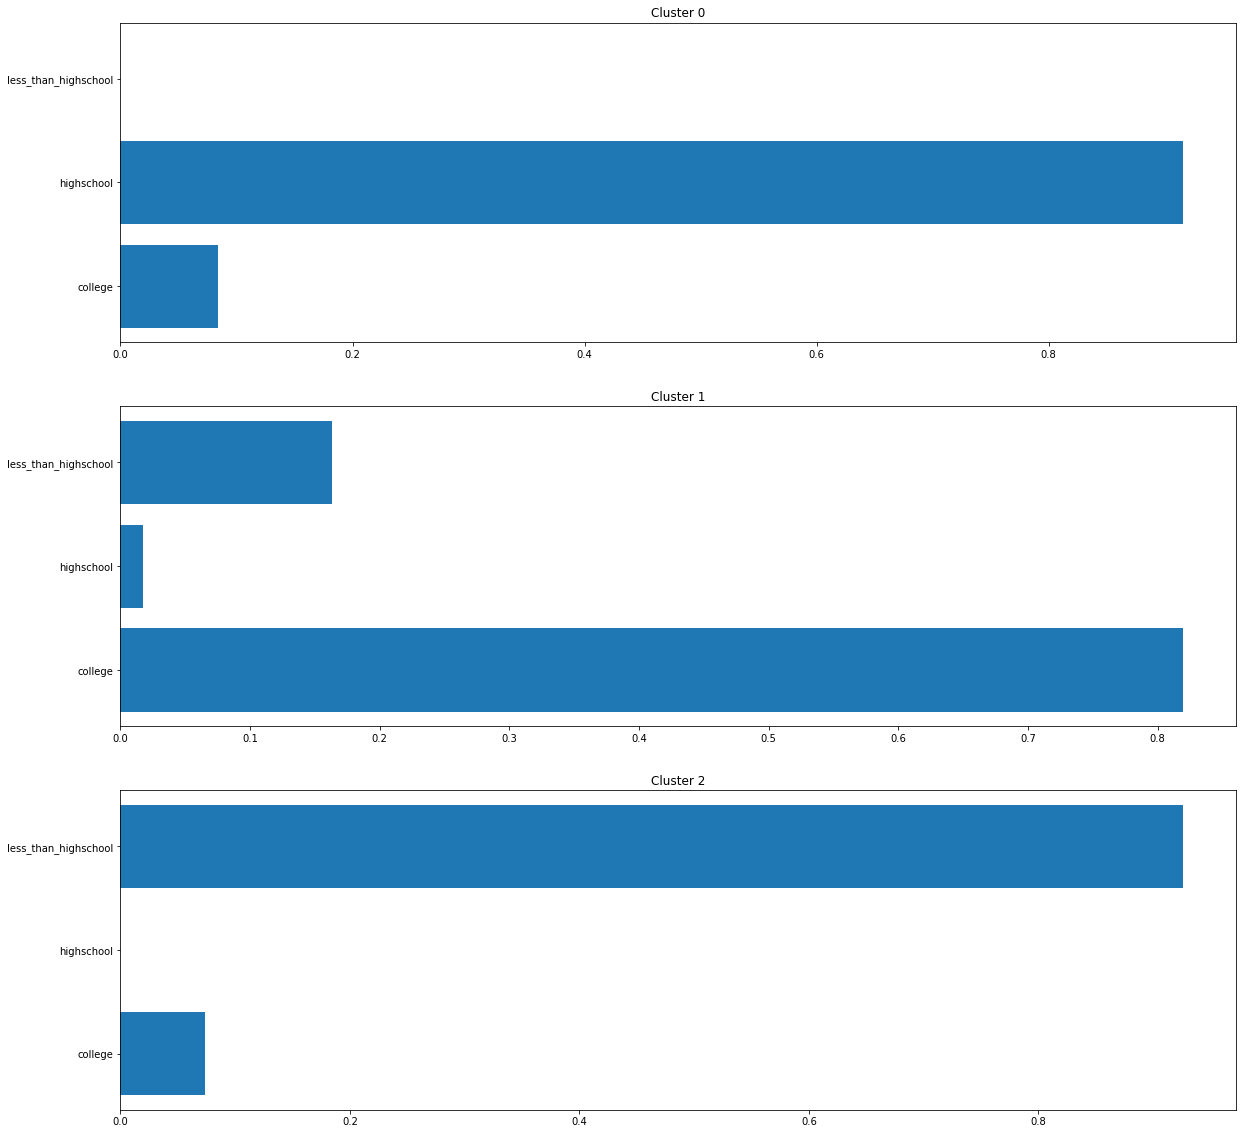

In [ ]:
plt.figure(figsize = (20,20))
for i in range(3):
    cluster_df = age_education_df[age_education_df['Cluster'] == i]
    means = cluster_df[['college','highschool','less_than_highschool']].mean()
    ax = plt.subplot(3, 1, i+1)
    plt.barh([1,2,3],means)
    ax.set_yticks([1,2,3])
    ax.set_yticklabels(['college','highschool','less_than_highschool'])
    ax.set_title('Cluster ' + str(i))
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ff5e2091-543c-4b2c-9a56-1e41bbaff775' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>